In [1]:
import math

In [2]:
def mean(rv):
    """
    Given a random variable, 
    return the mean of the random variable
    """
    return sum(rv) / len(rv)

In [3]:
def variance(rv):
    """
    Given a sample draws from population
    returns the variance (corrected by bezzel's)
    """
    m = mean(rv)
    n = len(rv)
    var = sum([((ix - m) ** 2) / (n - 1) for ix in rv])
    return var

def standard_deviation(rv):
    """
    Assumes the sample is drawn from a population,
    hence denominator is (n - 1), popularly known as
    Bezzel's correction
    """
    var = variance(rv)
    return var ** 0.5

In [4]:
def covariance(x, y):
    """
    Given two random variable X and Y
    returns the linear relationship
    """
    mean_x, mean_y = mean(x), mean(y)
    return (1 / len(x)) * sum([(ix - mean_x) * (iy - mean_y) for ix, iy in zip(x, y)])

def pearson_correlation_coeff(x, y):
    """
    Computes the pearson correlation coefficient
    measure for two random variable
    """
    covar = covariance(x, y)
    return covar / (standard_deviation(x) * standard_deviaiton(y))

from scipy.stats import rankdata
def spearman_rank_correlation(x, y):
    """
    Computes spearman rank correlation coefficient
    """
    rank_x, rank_y = rankdata(x), rankdata(y)
    return pearson_correlation_coeff(rank_x, rank_y)

In [5]:
def median(rv):
    """
    Much more robust when we have outliers in our dataset.
    """
    sorted_rv = sorted(rv)
    length = len(sorted_rv)
    isEven = True if length % 2 == 0 else False
    if isEven:
        i, j = length // 2, (length // 2) - 1
        return mean([sorted_rv[i], sorted_rv[j]])
    else:
        return sorted_rv[length // 2]

In [6]:
def quantile(rv, q = 0.25):
    sorted_rv = sorted(rv)
    length = len(sorted_rv) - 1
    
    index = length * q
    if index.is_integer():
        return sorted_rv[int(index)]
    else:
        low, high = math.floor(index), math.ceil(index)
        
        lower_value = sorted_rv[low]
        upper_value = sorted_rv[high]
        
        return round(lower_value + (index - low) * (upper_value - lower_value), 2)
    
    
# Quantiles divides the values into equal parts where we have exactly num_parts - 1 separators
arr = [4, 2, 5, 7, 2, 5, 21, 5]

print("1st quantile:", quantile(arr, 0.25))
print("2nd quantile:", quantile(arr, 0.50))
print("3rd quantile:", quantile(arr, 0.75))

print("Mean:", mean(arr))
print("IQR:", quantile(arr, 0.75) - quantile(arr, 0.25))

1st quantile: 3.5
2nd quantile: 5.0
3rd quantile: 5.5
Mean: 6.375
IQR: 2.0


In [8]:
def percentile(arr, p):
    sorted_arr = sorted(arr)
    length = len(sorted_arr)
    index = p * (length - 1) * 0.01
    # Linear interpolation
    low, high = math.floor(index), math.ceil(index)
    low_val, high_val = sorted_arr[low], sorted_arr[high]
    val = low_val + (index - low) * (high_val - low_val)
    return round(val, 2)
            
        
arr = [4, 2, 5, 7, 2, 5, 21, 5]
print("25 percentile", percentile(arr, 25))
print("50 percentile", percentile(arr, 50))
print("75 percentile", percentile(arr, 75))

25 percentile 3.5
50 percentile 5.0
75 percentile 5.5


### Proportional Sampling

Proportional sampling is a sampling technique where the size of each stratum sample is directly proportional to the population size of the entire population of strata. This means that each strata sample has the same sampling fraction. 

In [9]:
from numpy.random import uniform, normal

def proportional_sampling(arr, num_samples):
    total = sum(arr)
    normalized_arr = [a / total for a in arr]
    
    # computing prefix sum
    prefix_sum = [normalized_arr[0]]
    for num in normalized_arr[1:]:
        prefix_sum.append(prefix_sum[-1] + num)
        
    samples = []
    for i in uniform(size = num_samples):
        for index, value in enumerate(prefix_sum):
            if i < value:
                samples.append(arr[index])
                break
    return samples

In [10]:
population = uniform(0.1, 10000, 500).astype("int16")
sampled = proportional_sampling(population, 10)
print("Sampled using proportional sampling:", sampled)

Sampled using proportional sampling: [9492, 6898, 8335, 7442, 7294, 9312, 3821, 6972, 4596, 4253]


### Central Limit Theorem

In [11]:
import matplotlib.pyplot as plt
from random import choice, randint

def central_limit_theorem(population, sample_size, iterations):
    assert sample_size < len(population), "Sample size should be smaller than the population."
    sample_means = []
    for i in range(iterations):
        sampling_distribution = [choice(population) for sample in range(sample_size)]
        sample_means.append(mean(sampling_distribution))
    
    plt.hist(sample_means, bins = 15)
    plt.grid(True)
    plt.show();
    
    return sample_means

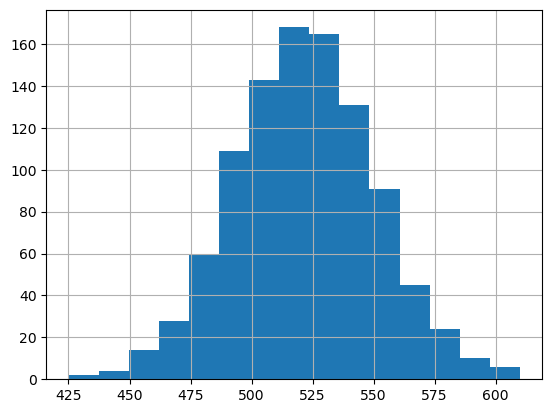

In [12]:
population = [randint(1, 1000) for _ in range(1000)]
sample_means = central_limit_theorem(population, 100, 1000)

### Quantile-Quantile Plot

In [13]:
def get_percentiles(rv):
    length = len(rv) - 1
    sorted_rv = sorted(rv)
    percentiles = []
    for i in range(1, 101):
        index = i * length * 0.01
        if index.is_integer():
            percentiles.append(sorted_rv[int(index)])
        else:
            low, high = math.floor(index), math.ceil(index)
            low_val, high_val = sorted_rv[low], sorted_rv[high]
            perc_val = low_val + (index - low) * (high_val - low_val)
            percentiles.append(perc_val)
    return percentiles

In [14]:
# Q: Does CLT really work?
def QQplot(rv1, rv2):
    x_values = get_percentiles(rv1)
    y_values = get_percentiles(rv2)
    
    plt.scatter(x_values, y_values, color='blue', alpha=0.5, label='Data Points')
    plt.grid(True)
    plt.show();

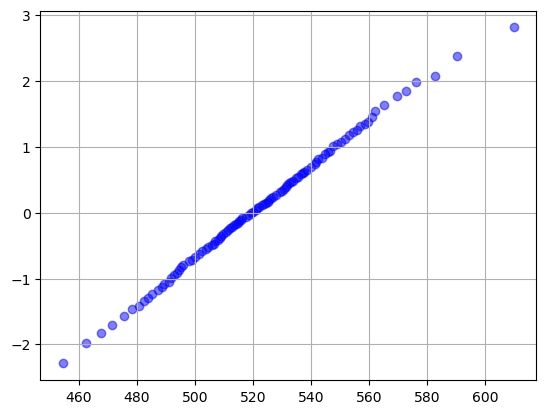

In [15]:
nd_samples = normal(0, 1, 1000)
QQplot(sample_means, nd_samples)

This is roughly a line with 45 degree angle, so CLT definitely works!

### Confidence Intervals

In [16]:
from scipy.stats import norm, t

In [55]:
class ConfidenceInterval:
    """
    Given a sample distribution estimates the 
    mean of the population distribution. 
    """
    def __init__(self, C, population_std_dev = None):
        self.C = C
        self.alpha = 1 - C
        self.std_dev = population_std_dev
        
    def estimate_mean(self, samples):
        sample_size = len(samples)
        sample_mean = mean(samples)
        
        # If population standard deviation is given then CLT will be used
        if self.std_dev:
            print("Population standard deviation is given. Estimating mean...")
            margin_of_error = norm.ppf(1 - self.alpha/2)
        
        # In-case population standard deviation is not given
        # need to check if sample size if atleast 30
        elif not self.std_dev:
            self.std_dev = standard_deviation(samples)
            # Uses t-distribution for small samples
            if sample_size < 30:
                print("Population standard deviation is not provided, using sample standard deviation...")
                print("Sample size is small, using t-distribution...")
                degrees_of_freedom = sample_size - 1
                margin_of_error = t.ppf(1 - self.alpha/2, df=degrees_of_freedom)
            else:
                # Normal distribution works well for large samples
                print("Population standard deviation is not provided, using sample standard deviation..")
                print("Margin of error will be computed from normal distribution, sample size is large..")
                margin_of_error = norm.ppf(1 - self.alpha/2)
            
            
        # Computing the confidence interval
        around = (margin_of_error * (self.std_dev / (sample_size) ** 0.5))
        lower_bound = sample_mean - around
        upper_bound = sample_mean + around
        return {
            "confidence" : f"{self.C * 100}%",
            "lower_bound" : round(lower_bound, 2),
            "upper_bound" : round(upper_bound, 2)
        }
    
    def estimate_mean_using_bootstrapping(self, samples, bootstrapping_sample_size = 30, iteration = 1000):
        # Uses bootstrapping to estimate the mean
        parameter_of_sampling_distribution = []
        for i in range(iteration):
            new_sample = [choice(samples) for i in range(bootstrapping_sample_size)]
            new_sample_mean = mean(new_sample)
            parameter_of_sampling_distribution.append(new_sample_mean)
        
        # computing intervals
        low = math.floor(((1 - self.C) // 2) * 100)
        high =  math.ceil((self.C + low) * 100)
        
        lower_bound = percentile(parameter_of_sampling_distribution, low)
        upper_bound = percentile(parameter_of_sampling_distribution, high)
        
        return {
            "confidence" : f"{self.C * 100}%",
            "lower_bound" : round(lower_bound, 2),
            "upper_bound" : round(upper_bound, 2)
        }

In [69]:
# generate population from an uniform distribution
# size is 10000 for population data
population = [randint(10, 10000) for i in range(1000)]
print("Population mean:", mean(population))

# sampling 100 points from population
samples = [choice(population) for i in range(100)]

# we want to estimate the population mean using the samples
# Population standard deviation will not be provided
ci = ConfidenceInterval(C = 0.95)
estimation_dict = ci.estimate_mean(samples)

print(estimation_dict)

Population mean: 4976.677
Population standard deviation is not provided, using sample standard deviation..
Margin of error will be computed from normal distribution, sample size is large..
{'confidence': '95.0%', 'lower_bound': 4376.64, 'upper_bound': 5494.68}


In [70]:
# generate population from an uniform distribution
# size is 10000 for population data
population = [randint(10, 10000) for i in range(1000)]
print("Population mean:", mean(population))

# sampling 100 points from population
samples = [choice(population) for i in range(20)]

# we want to estimate the population mean using the samples
# Population standard deviation will not be provided
ci = ConfidenceInterval(C = 0.95)
estimation_dict = ci.estimate_mean(samples)

print(estimation_dict)

Population mean: 4990.886
Population standard deviation is not provided, using sample standard deviation...
Sample size is small, using t-distribution...
{'confidence': '95.0%', 'lower_bound': 3871.86, 'upper_bound': 6693.34}


In [68]:
# generating sample population
population = [randint(10, 10000) for i in range(1000)]
print("Population mean:", mean(population))

# random sampling from population
samples = [choice(population) for i in range(100)]

# confidence intervals using bootstrappin
ci = ConfidenceInterval(C = 0.95)
estimation_dict = ci.estimate_mean_using_bootstrapping(samples, 
                                                       bootstrapping_sample_size = 100, 
                                                       iteration = 10000)

print(estimation_dict)

Population mean: 4902.213
{'confidence': '95.0%', 'lower_bound': 4287.42, 'upper_bound': 5728.42}


### Principle Component Analysis

In [68]:
import numpy as np
from sklearn.preprocessing import StandardScaler